# BI CASE STUDY PROJECT :
OBJECTIVE:


1.   Insights on best days in week or month to expect cost efficient visitors.
2.   Time and series Analysis 
3.   Return of ad spend according to net revenue 
4.   TPL conversion must be cost effective or higher conversion rate ?
5.   Comp Sales must be cost effective or higher conversion rate ?



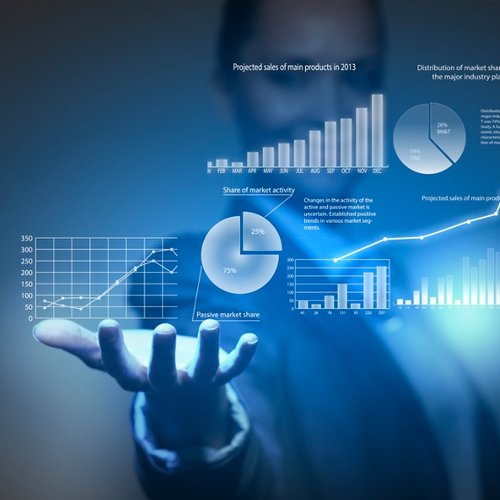

First import the basic python libraries for mathematical computation and visualization purpose 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Import data files 

First we will import daily_data file from browser and display the dataframe using pandas function

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving daily_data.xlsx to daily_data (2).xlsx


In [ ]:
import io
daily_data=pd.read_excel(io.BytesIO(uploaded['daily_data.xlsx']))
daily_data.head(5)

,Unnamed: 0,Sessions,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Leads,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Cost,Unnamed: 15,Unnamed: 16,Unnamed: 17,Sales,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,Date,Organic,Direct,Paid Search,Social,Email/SMS,Others,Organic,Direct,Paid Search,Social,Email/SMS,Others,Total Leads,Google ads,Social,Email/SMS,Others,TPL sales,Comp sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Date,W.Day,W. No,Month
1,2021-04-01 00:00:00,25,129,966,7,0,340,4,2,25,40,0,4,74,248,774,0,0,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03 00:00:00,Sun,2,1
2,2021-04-02 00:00:00,7,44,285,0,0,14,0,2,0,15,0,0,17,2,150,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04 00:00:00,Mon,2,1
3,2021-04-03 00:00:00,18,104,872,2,0,115,6,2,25,42,2,2,78,717,546,0,0,3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-05 00:00:00,Tue,2,1
4,2021-04-04 00:00:00,25,179,1010,5,0,331,2,4,19,57,10,0,91,272,934,99,0,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06 00:00:00,Wed,2,1


Now we will import sales data file of excel and display its results 

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving sales_data.xlsx to sales_data (2).xlsx


In [ ]:
import io 
sales_data=pd.read_excel(io.BytesIO(uploaded['sales_data.xlsx']))
sales_data.head(5)

,Date,Policy Type,Amount Paid,Lead Source,Lead Medium,GMV,Premium Value
0,2021-04-01,comprehensive,1029.0,Direct,Direct,980,1400
1,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
2,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
3,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
4,2021-04-01,comprehensive,882.0,google,discovery,840,1400


Before proceeding towards exploratory data analysis first we will clean the data by removing unnecessary data and remove duplicate data from dataset

## Data cleaning 

data cleaning and removing repitative and missing data from dataset is actually called data cleaning which is the most important step of data analytics to go proceed , since not all datasets are cleaned therefore cleaning data set is the prior step before proceeding towards exploratory data analysis 

first we will perform data cleaning of daily data of excel sheet , both the datasets will undergo two methods to find out missing data that is heatmap through seaborn library and percentage list method through for statement and basic python code 

lets first find out the missing data through heatmap , where the missing data will be recognized through different color on heatmap , the yellow color represents missing data in dataset and the blue color will show remaining features in dataset in each column 

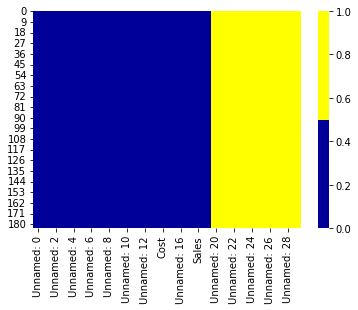

In [ ]:
#lets first find out the missing data in dataset through heatmap 
cols=daily_data.columns[:30]
colours=['#000099', '#ffff00']
sns.heatmap(daily_data[cols].isnull(),cmap=sns.color_palette(colours))

The above heatmap shows yellow colour as missing data and blue colour represents the data which is already present there.

lets now find out missing data through percentage list method

In [ ]:
# % of missing 
for col in daily_data.columns:
  pct_missing= np.mean(daily_data[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Sessions - 0%
Unnamed: 2 - 0%
Unnamed: 3 - 0%
Unnamed: 4 - 0%
Unnamed: 5 - 0%
Unnamed: 6 - 0%
Leads - 0%
Unnamed: 8 - 0%
Unnamed: 9 - 0%
Unnamed: 10 - 0%
Unnamed: 11 - 0%
Unnamed: 12 - 0%
Unnamed: 13 - 0%
Cost - 0%
Unnamed: 15 - 0%
Unnamed: 16 - 0%
Unnamed: 17 - 0%
Sales - 0%
Unnamed: 19 - 0%
Unnamed: 20 - 100%
Unnamed: 21 - 100%
Unnamed: 22 - 100%
Unnamed: 23 - 100%
Unnamed: 24 - 100%
Unnamed: 25 - 100%
Unnamed: 26 - 100%
Unnamed: 27 - 100%
Unnamed: 28 - 100%
Unnamed: 29 - 100%
Unnamed: 30 - 100%
Unnamed: 31 - 100%
Unnamed: 32 - 100%
Unnamed: 33 - 100%
Unnamed: 34 - 100%
Unnamed: 35 - 100%
Unnamed: 36 - 0%
Unnamed: 37 - 0%
Unnamed: 38 - 0%
Unnamed: 39 - 0%


we will now perform some basis operations to rename the columns and find basic insights of data that includes shape of dataset to avoid future bugs , info function to find out the column names there content if they are null or not and data type of each data set 

In [ ]:
daily_data.shape

(184, 40)

In [ ]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   184 non-null    object 
 1   Sessions     184 non-null    object 
 2   Unnamed: 2   184 non-null    object 
 3   Unnamed: 3   184 non-null    object 
 4   Unnamed: 4   184 non-null    object 
 5   Unnamed: 5   184 non-null    object 
 6   Unnamed: 6   184 non-null    object 
 7   Leads        184 non-null    object 
 8   Unnamed: 8   184 non-null    object 
 9   Unnamed: 9   184 non-null    object 
 10  Unnamed: 10  184 non-null    object 
 11  Unnamed: 11  184 non-null    object 
 12  Unnamed: 12  184 non-null    object 
 13  Unnamed: 13  184 non-null    object 
 14  Cost         184 non-null    object 
 15  Unnamed: 15  184 non-null    object 
 16  Unnamed: 16  184 non-null    object 
 17  Unnamed: 17  184 non-null    object 
 18  Sales        184 non-null    object 
 19  Unnamed:

since the description method shows that we still have missing and garbage data to be removed from the dataset therefore we will do that first 

In [ ]:
daily_data.describe()

,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we have performed a function of duplicated to find of there are duplicates in our dataset or not because duplicate values gives you less accurate results , if the dataset will have duplicated values it will turn be True along with its index value and if the dataset does not have duplicated value it will simply show false near its index value for proper identification 

In [ ]:
daily_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
179    False
180    False
181    False
182    False
183    False
Length: 184, dtype: bool

In [ ]:
daily_data.columns

Index(['Unnamed: 0', 'Sessions', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Leads', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Cost',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Sales', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

lets now first rename the columns to make data look more accurate

since we notice that the column names are unknown and data inside them is also missing somewhere, we will first rename the required column name to remove repitation and get accurate results 

In [ ]:
daily_data_copy=daily_data.copy()
daily_data_rename=daily_data_copy.rename(columns={'Unnamed: 0': 'Date', 'Sesssions': 'Organic_sessions', 'Unnamed: 2': 'Direct_sessions', 'Unnamed: 3': 'paidsearch_sessions' , 'Unnamed: 4': 'Social_sessions' , 'Unnamed: 5': 'email/sms_sessions' , 'Unnamed: 6': 'others_sessions' , 'Leads':'Leads_organic' , 'Unnamed: 8': 'Leads_direct' , 'Unnamed: 9': 'Leads_paidsearch' , 'Unnamed: 10': 'Leads_social' , 'Unnamed: 11': 'Leads_email/sms' , 'Unnamed: 12': 'Leads_others' , 'Unnamed: 13': 'Total_leads' , 'Cost':'Cost_googleadds' , 'Unnamed: 14': 'cost_social' ,'Unnamed: 15': 'Cost_social' , 'Unnamed: 16': 'Cost_email/sms' , 'Unnamed: 17': 'Cost_others' , 'Sales': 'TPL_Sales' , 'Unnamed: 19': 'Comp_Sales','Unnamed: 37': 'Week_days','Unnamed: 38': 'week_no','Unnamed: 39': 'Month'})
daily_data_rename.head(5)

,Date,Sessions,Direct_sessions,paidsearch_sessions,Social_sessions,email/sms_sessions,others_sessions,Leads_organic,Leads_direct,Leads_paidsearch,Leads_social,Leads_email/sms,Leads_others,Total_leads,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,TPL_Sales,Comp_Sales,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Week_days,week_no,Month
0,Date,Organic,Direct,Paid Search,Social,Email/SMS,Others,Organic,Direct,Paid Search,Social,Email/SMS,Others,Total Leads,Google ads,Social,Email/SMS,Others,TPL sales,Comp sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Date,W.Day,W. No,Month
1,2021-04-01 00:00:00,25,129,966,7,0,340,4,2,25,40,0,4,74,248,774,0,0,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-03 00:00:00,Sun,2,1
2,2021-04-02 00:00:00,7,44,285,0,0,14,0,2,0,15,0,0,17,2,150,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04 00:00:00,Mon,2,1
3,2021-04-03 00:00:00,18,104,872,2,0,115,6,2,25,42,2,2,78,717,546,0,0,3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-05 00:00:00,Tue,2,1
4,2021-04-04 00:00:00,25,179,1010,5,0,331,2,4,19,57,10,0,91,272,934,99,0,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06 00:00:00,Wed,2,1


Now lets find out numeric and non numeric types of data 

lets drop all the features having most unknown values 

we know that a feature that contains maximum missing values it should be removed completely from the dataset and new table is generated to perform further  operations according to it , therefore we have dropped the columns with maximum missing data 

In [ ]:
cols_to_drop=['Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36']
cleaned_daily_data=daily_data_rename.drop(cols_to_drop,axis=1)
cleaned_daily_data_2=daily_data_rename.drop(cols_to_drop,axis=1)

In [ ]:
for col in cleaned_daily_data.columns:
    pct_missing = np.mean(cleaned_daily_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Sessions - 0%
Direct_sessions - 0%
paidsearch_sessions - 0%
Social_sessions - 0%
email/sms_sessions - 0%
others_sessions - 0%
Leads_organic - 0%
Leads_direct - 0%
Leads_paidsearch - 0%
Leads_social - 0%
Leads_email/sms - 0%
Leads_others - 0%
Total_leads - 0%
Cost_googleadds - 0%
Cost_social - 0%
Cost_email/sms - 0%
Cost_others - 0%
TPL_Sales - 0%
Comp_Sales - 0%
Week_days - 0%
week_no - 0%
Month - 0%


Now you can see that the data is cleaned completely since there is no missing values in each feature and column names are renamed according to their data specification too

Now lets find out numeric and non numeric data from daily dataset 

In [ ]:
cleaned_daily_data.columns

Index(['Date', 'Sessions', 'Direct_sessions', 'paidsearch_sessions',
       'Social_sessions', 'email/sms_sessions', 'others_sessions',
       'Leads_organic', 'Leads_direct', 'Leads_paidsearch', 'Leads_social',
       'Leads_email/sms', 'Leads_others', 'Total_leads', 'Cost_googleadds',
       'Cost_social', 'Cost_email/sms', 'Cost_others', 'TPL_Sales',
       'Comp_Sales', 'Week_days', 'week_no', 'Month'],
      dtype='object')

In [ ]:
#select numeric columns from data 
cleaned_daily_data_numeric= cleaned_daily_data.select_dtypes(include=[np.number])
numeric_cols = cleaned_daily_data_numeric.columns.values
print(numeric_cols)

[]


Now lets drop the duplicates of data present in the features of dataset and display the cleaned dataset 

In [ ]:
#select non numeric columns from data 
cleaned_daily_data_nonnumeric=cleaned_daily_data.select_dtypes(exclude=[np.number])
non_numeric_cols=cleaned_daily_data_nonnumeric.columns.values
print(non_numeric_cols)

['Date' 'Sessions' 'Direct_sessions' 'paidsearch_sessions'
 'Social_sessions' 'email/sms_sessions' 'others_sessions' 'Leads_organic'
 'Leads_direct' 'Leads_paidsearch' 'Leads_social' 'Leads_email/sms'
 'Leads_others' 'Total_leads' 'Cost_googleadds' 'Cost_social'
 'Cost_email/sms' 'Cost_others' 'TPL_Sales' 'Comp_Sales' 'Week_days'
 'week_no' 'Month']


In [ ]:
cleaned_daily_data.drop_duplicates(inplace=True)

In [ ]:
cleaned_daily_data.head(5)

,Date,Sessions,Direct_sessions,paidsearch_sessions,Social_sessions,email/sms_sessions,others_sessions,Leads_organic,Leads_direct,Leads_paidsearch,Leads_social,Leads_email/sms,Leads_others,Total_leads,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,TPL_Sales,Comp_Sales,Week_days,week_no,Month
0,Date,Organic,Direct,Paid Search,Social,Email/SMS,Others,Organic,Direct,Paid Search,Social,Email/SMS,Others,Total Leads,Google ads,Social,Email/SMS,Others,TPL sales,Comp sales,W.Day,W. No,Month
1,2021-04-01 00:00:00,25,129,966,7,0,340,4,2,25,40,0,4,74,248,774,0,0,2,7,Sun,2,1
2,2021-04-02 00:00:00,7,44,285,0,0,14,0,2,0,15,0,0,17,2,150,0,0,0,0,Mon,2,1
3,2021-04-03 00:00:00,18,104,872,2,0,115,6,2,25,42,2,2,78,717,546,0,0,3,9,Tue,2,1
4,2021-04-04 00:00:00,25,179,1010,5,0,331,2,4,19,57,10,0,91,272,934,99,0,7,12,Wed,2,1


Now the daily dataset is cleaned completely 

we will perform same operations to clean the next dataset that is sales dataset 

## Data Cleaning of sales dataset 

first we will simply display the provided dataset which we have already imported it from excel sheet 

In [ ]:
sales_data.head(5)

,Date,Policy Type,Amount Paid,Lead Source,Lead Medium,GMV,Premium Value
0,2021-04-01,comprehensive,1029.0,Direct,Direct,980,1400
1,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
2,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
3,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
4,2021-04-01,comprehensive,882.0,google,discovery,840,1400


we will perform some basic operations on sales dataset to find insights of data that includes shape, median , info , description 

In [ ]:
sales_data.shape

(2304, 7)

In [ ]:
sales_data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Amount Paid       819.0
GMV               780.0
Premium Value    1110.0
dtype: float64

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2304 non-null   datetime64[ns]
 1   Policy Type    2304 non-null   object        
 2   Amount Paid    2304 non-null   float64       
 3   Lead Source    1872 non-null   object        
 4   Lead Medium    1872 non-null   object        
 5   GMV            2304 non-null   int64         
 6   Premium Value  2304 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 126.1+ KB


In [ ]:
sales_data.describe()

,Amount Paid,GMV,Premium Value
count,2304.000000,2304.000000,2304.000000
mean,964.440039,918.493056,1300.782986
std,605.619463,576.802687,815.130891
min,77.700000,74.000000,74.000000
25%,630.000000,600.000000,750.000000
50%,819.000000,780.000000,1110.000000
75%,1229.000000,1170.000000,1400.000000
max,12138.000000,11560.000000,15000.000000


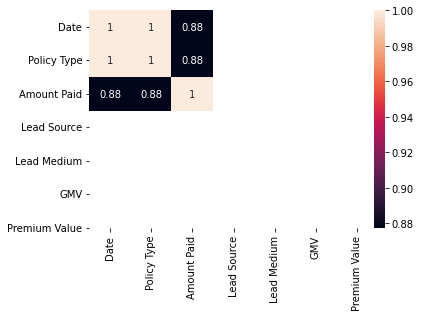

In [ ]:
correlation_sales= sales_data.corr()
sns.heatmap(correlation_sales, annot=True, xticklabels=sales_data.columns, yticklabels=sales_data.columns)

inorder to view number of columns we will first use columns functions to find out names of columns and to find out either we are required to name them according to the data present in each feature

In [ ]:
sales_data.columns

Index(['Date', 'Policy Type', 'Amount Paid', 'Lead Source', 'Lead Medium',
       'GMV', 'Premium Value'],
      dtype='object')

lets indivisually find out and sort out numeric and non numeric data columns so that we can drop the feature incase if missing values are maximum or we can replace the data according to its type

In [ ]:
#numeric columns in sales data 
sales_data_numeric = sales_data.select_dtypes(include=[np.number])
numeric_cols_sales= sales_data_numeric.columns.values
print(numeric_cols_sales)

['Amount Paid' 'GMV' 'Premium Value']


In [ ]:
#non numeric columns in sales data
sales_data_non_numeric = sales_data.select_dtypes(exclude=[np.number])
non_numeric_cols_sales= sales_data_non_numeric.columns.values
print(non_numeric_cols_sales) 

['Date' 'Policy Type' 'Lead Source' 'Lead Medium']


now lets find if there is missing data in the sales dataset so we should remove that feature or replace it with median for all numeric values and consider none for all non numeric values 

## missing data analysis of sales dataset 

we will perform two methods to find out the missing data in a partcular dataset , first is through seaborn heatmap to view graphical result and another method is percentage list method to find out accuracy of dataset ,

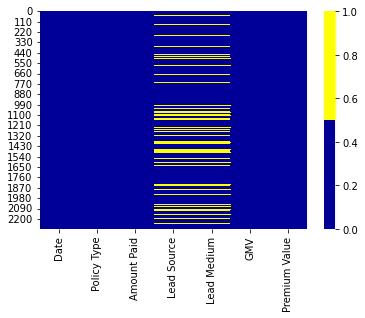

In [ ]:
cols= sales_data.columns[:30]
colours=['#000099', '#ffff00']
sns.heatmap(sales_data[cols].isnull(),cmap=sns.color_palette(colours))

The yellow shaded portion of graph shows missing values in some features 

Lets now visualize the missing data through percentage list 

In [ ]:
for col in sales_data.columns:
  pct_missing=np.mean(sales_data[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0%
Policy Type - 0%
Amount Paid - 0%
Lead Source - 19%
Lead Medium - 19%
GMV - 0%
Premium Value - 0%


Since we have found Lead source and Lead medium having less number of missing and uncleaned data therefore we will not drop the whole feature instead we will only replace them will none 

In [ ]:
sales_data['Lead Source'].unique()

array(['Direct', 'fb', 'google', nan, 'sms', 'email', 'instagram', 'Ad'],
      dtype=object)

In [ ]:
#lets replace the Lead source missing values to none
sales_data['Lead Source']=sales_data['Lead Source'].fillna('None')

In [ ]:
sales_data['Lead Medium'].unique()

array(['Direct', 'cpc', 'discovery', nan, 'GL', 'hala21', 'EB', 'organic',
       'CA', '1k', 'MC', 'RM', 'P1CA', 'FB', 'P8CA', 'social', 'MCB',
       'MCA', 'confirmation', 'UAE49',
       'cpc?qid=612b3c51a23af1332caa4?qid=612b3c89a23af1332caa6'],
      dtype=object)

In [ ]:
sales_data['Lead Medium']= sales_data['Lead Medium'].fillna('None')

In [ ]:
sales_data.sort_values('Date')
sales_data.head(5)

,Date,Policy Type,Amount Paid,Lead Source,Lead Medium,GMV,Premium Value
0,2021-04-01,comprehensive,1029.0,Direct,Direct,980,1400
1,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
2,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
3,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
4,2021-04-01,comprehensive,882.0,google,discovery,840,1400


now we will display the cleaned dataset by removing all missing values and renaming the column name too , we have created a copy of sales data table to be used in further calculations ahead if required.

In [ ]:
sales_data_copy=sales_data.copy()
sales_data_final=sales_data_copy.rename(columns={'Policy Type': 'policy_type', 'Amount Paid': 'amount_paid', 'Lead Source': 'lead_source', 'Lead Medium': 'lead_medium' , 'Premium Value': 'premium_value' })
sales_data_final.head(5)

,Date,policy_type,amount_paid,lead_source,lead_medium,GMV,premium_value
0,2021-04-01,comprehensive,1029.0,Direct,Direct,980,1400
1,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
2,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
3,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
4,2021-04-01,comprehensive,882.0,google,discovery,840,1400


# Insights on best days in week or month to expect cost efficient visitors.

## Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

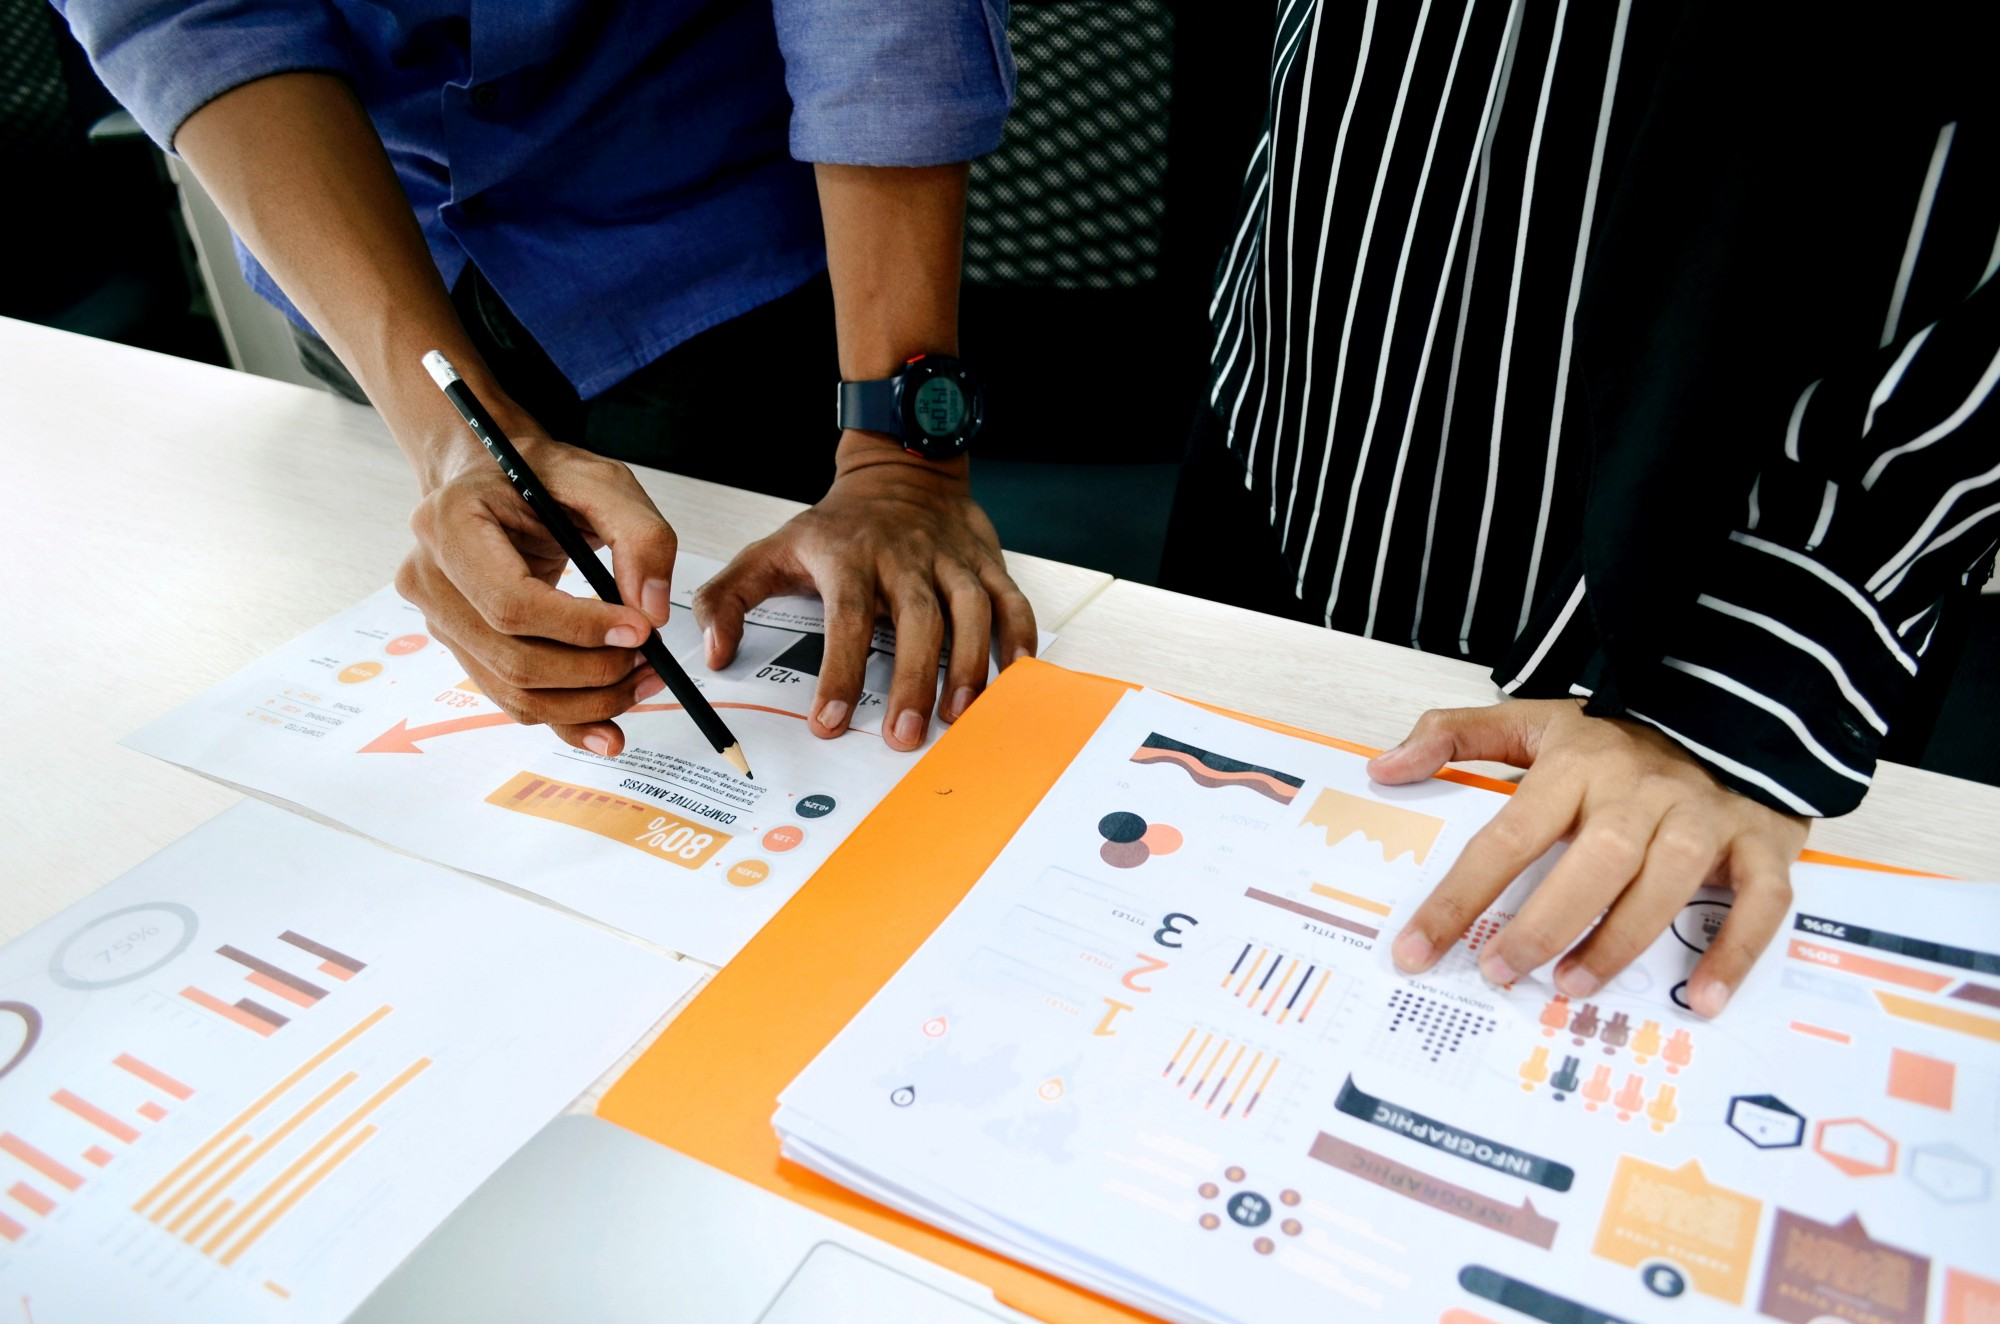

In [ ]:
cleaned_daily_data.head(5)

,Date,Sessions,Direct_sessions,paidsearch_sessions,Social_sessions,email/sms_sessions,others_sessions,Leads_organic,Leads_direct,Leads_paidsearch,Leads_social,Leads_email/sms,Leads_others,Total_leads,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,TPL_Sales,Comp_Sales,Week_days,week_no,Month
0,Date,Organic,Direct,Paid Search,Social,Email/SMS,Others,Organic,Direct,Paid Search,Social,Email/SMS,Others,Total Leads,Google ads,Social,Email/SMS,Others,TPL sales,Comp sales,W.Day,W. No,Month
1,2021-04-01 00:00:00,25,129,966,7,0,340,4,2,25,40,0,4,74,248,774,0,0,2,7,Sun,2,1
2,2021-04-02 00:00:00,7,44,285,0,0,14,0,2,0,15,0,0,17,2,150,0,0,0,0,Mon,2,1
3,2021-04-03 00:00:00,18,104,872,2,0,115,6,2,25,42,2,2,78,717,546,0,0,3,9,Tue,2,1
4,2021-04-04 00:00:00,25,179,1010,5,0,331,2,4,19,57,10,0,91,272,934,99,0,7,12,Wed,2,1


provide us with your insights on best days or weeks to expect cost efficient visitors 

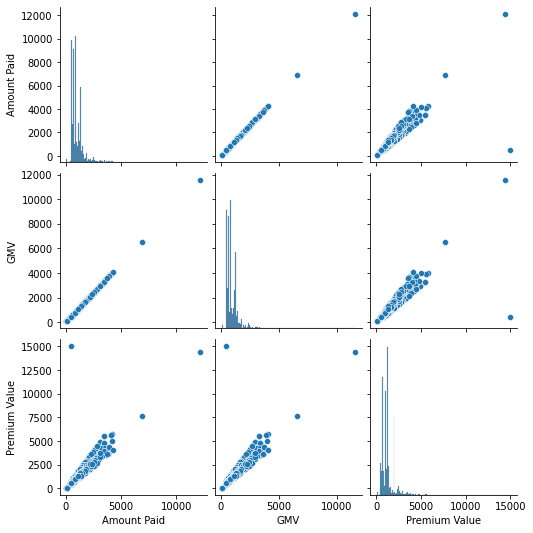

In [ ]:
import seaborn as sns 
sns.pairplot(data=sales_data)

we have used label encoder to convert all the values of data in numeric form to be used for regression models and other tasks since regression models dont support non numeric values in data 

In [ ]:
from sklearn.preprocessing import LabelEncoder
numeric_features=[x for x in cleaned_daily_data.columns if cleaned_daily_data[x].dtype=="object"]

le=LabelEncoder()

for col in numeric_features:
    if col in cleaned_daily_data.columns:
        i = cleaned_daily_data.columns.get_loc(col)
        cleaned_daily_data.iloc[:,i] = cleaned_daily_data.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
from sklearn.preprocessing import LabelEncoder
numeric_features=[x for x in sales_data_final.columns if sales_data_final[x].dtype=="object"]

le=LabelEncoder()

for col in numeric_features:
    if col in sales_data_final.columns:
        i = sales_data_final.columns.get_loc(col)
        sales_data_final.iloc[:,i] = sales_data_final.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
cleaned_daily_data.head(5)

,Date,Sessions,Direct_sessions,paidsearch_sessions,Social_sessions,email/sms_sessions,others_sessions,Leads_organic,Leads_direct,Leads_paidsearch,Leads_social,Leads_email/sms,Leads_others,Total_leads,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,TPL_Sales,Comp_Sales,Week_days,week_no,Month
0,183,48,92,154,42,2,137,12,11,47,92,19,9,95,143,143,17,8,19,22,6,27,7
1,0,16,11,150,34,0,85,9,6,14,62,0,6,85,53,126,0,0,10,19,3,10,0
2,1,38,73,85,0,0,11,0,6,0,27,0,0,35,37,35,0,0,0,0,1,10,0
3,2,10,1,134,13,0,6,10,6,14,63,6,5,86,127,112,0,0,12,21,5,10,0
4,3,16,30,5,27,0,83,7,8,10,71,1,0,92,59,138,16,0,16,4,7,10,0


In [ ]:
sales_data_final.head(5)

,Date,policy_type,amount_paid,lead_source,lead_medium,GMV,premium_value
0,2021-04-01,0,1029.0,1,2,980,1400
1,2021-04-01,0,1470.0,4,15,1400,2000
2,2021-04-01,0,1470.0,4,15,1400,2000
3,2021-04-01,0,1470.0,4,15,1400,2000
4,2021-04-01,0,882.0,5,17,840,1400


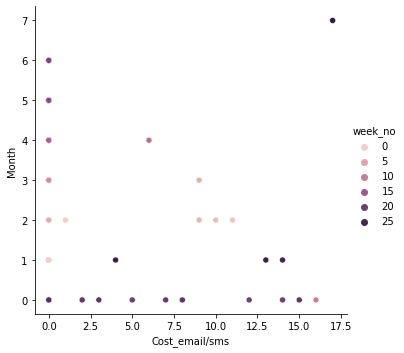

In [ ]:
sns.relplot(x="Cost_email/sms",y="Month",hue="week_no",data=cleaned_daily_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


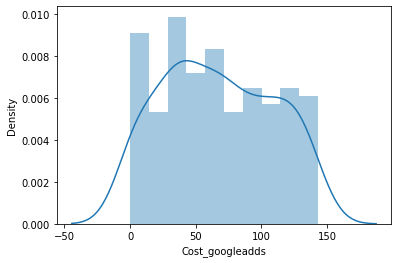

In [ ]:
sns.distplot(cleaned_daily_data['Cost_googleadds'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


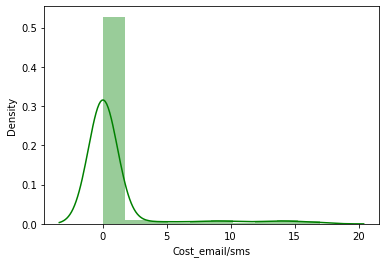

In [ ]:
sns.distplot(cleaned_daily_data['Cost_email/sms'],bins=10,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


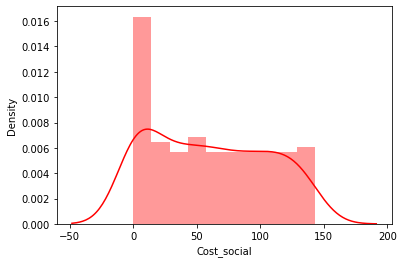

In [ ]:
sns.distplot(cleaned_daily_data['Cost_social'],bins=10,color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


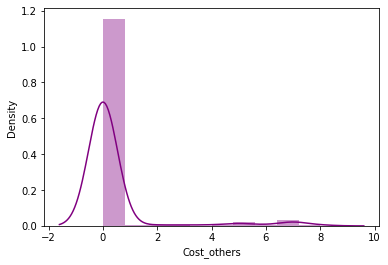

In [ ]:
sns.distplot(cleaned_daily_data['Cost_others'],bins=10,color="purple")

<Figure size 1440x720 with 0 Axes>

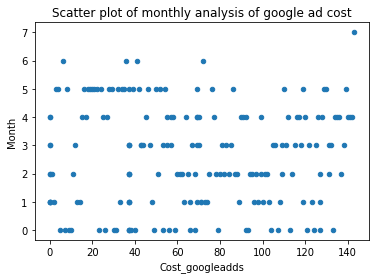

In [ ]:
%matplotlib inline 
fig=plt.figure(figsize=(20,10))
cleaned_daily_data.plot(kind='scatter',x='Cost_googleadds',y='Month')
plt.title("Scatter plot of monthly analysis of google ad cost")
plt.show()

<Figure size 1440x720 with 0 Axes>

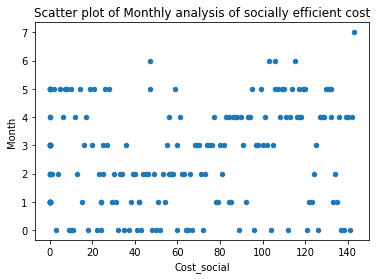

In [ ]:
%matplotlib inline 
fig=plt.figure(figsize=(20,10))
cleaned_daily_data.plot(kind='scatter',x='Cost_social',y='Month')
plt.title("Scatter plot of Monthly analysis of socially efficient cost")
plt.show()

<Figure size 1440x720 with 0 Axes>

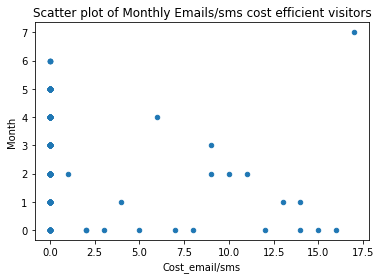

In [ ]:
%matplotlib inline 
fig=plt.figure(figsize=(20,10))
cleaned_daily_data.plot(kind="scatter",x='Cost_email/sms',y='Month')
plt.title("Scatter plot of Monthly Emails/sms cost efficient visitors")
plt.show()

<Figure size 1440x720 with 0 Axes>

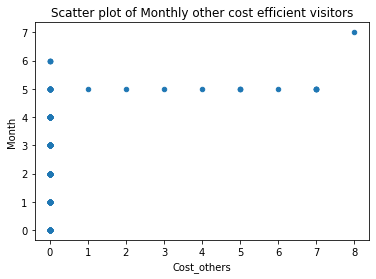

In [ ]:
%matplotlib inline 
fig=plt.figure(figsize=(20,10))
cleaned_daily_data.plot(kind="scatter",x='Cost_others',y='Month')
plt.title("Scatter plot of Monthly other cost efficient visitors")
plt.show()

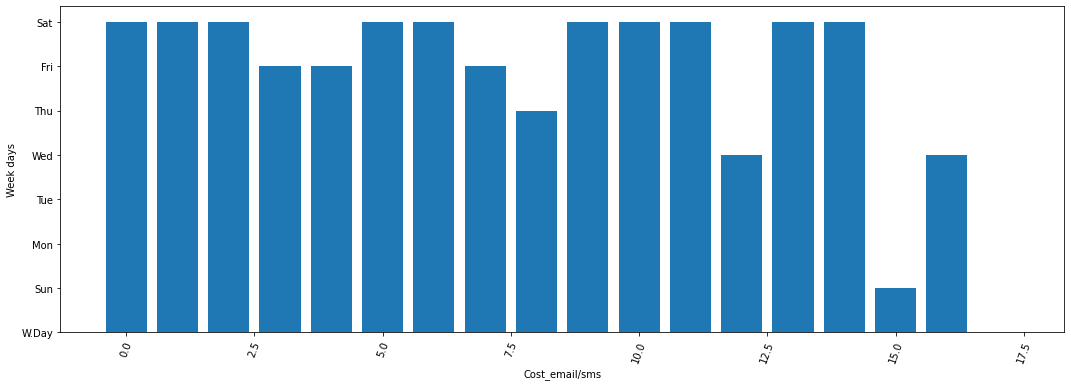

In [ ]:
plt.figure(figsize=(18,6))
plt.bar(cleaned_daily_data['Cost_email/sms'],cleaned_daily_data_2['Week_days'])
plt.xticks(rotation=70)
plt.xlabel('Cost_email/sms')
plt.ylabel('Week days')
plt.show()

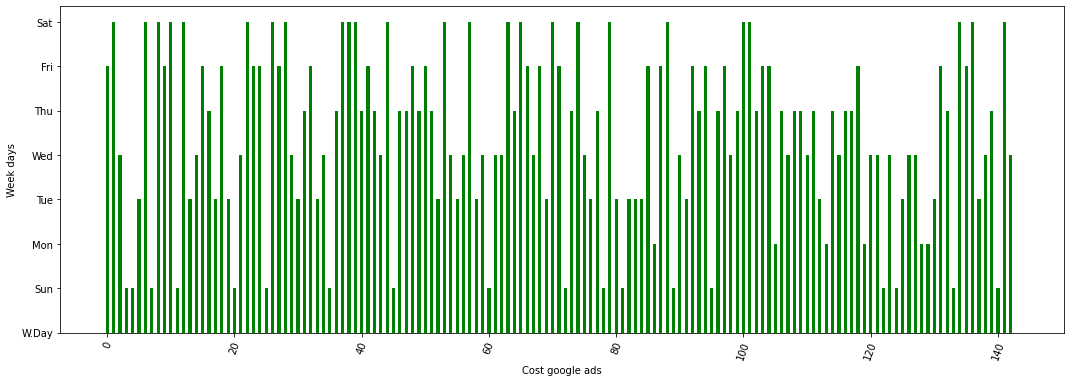

In [ ]:
plt.figure(figsize=(18,6))
plt.bar(cleaned_daily_data['Cost_googleadds'],cleaned_daily_data_2['Week_days'],color='g',width=0.5)
plt.xticks(rotation=70)
plt.xlabel('Cost google ads')
plt.ylabel('Week days')
plt.show()

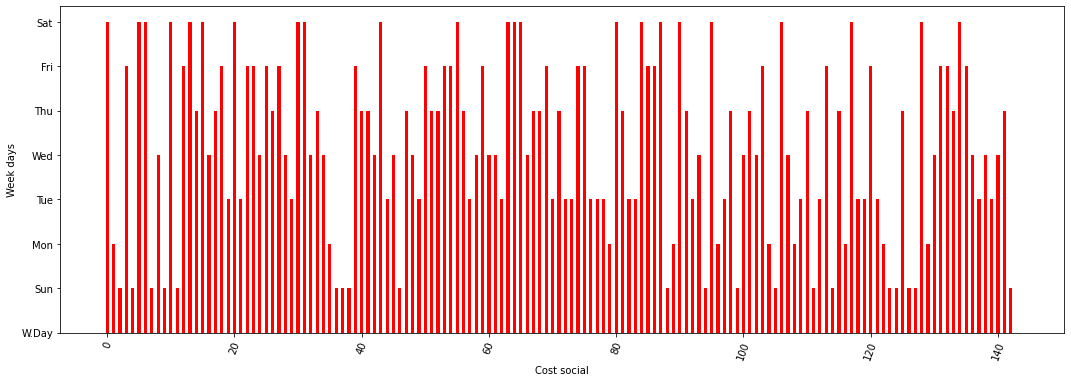

In [ ]:
plt.figure(figsize=(18,6))
plt.bar(cleaned_daily_data['Cost_social'],cleaned_daily_data_2['Week_days'],color='r',width=0.5)
plt.xticks(rotation=70)
plt.xlabel('Cost social')
plt.ylabel('Week days')
plt.show()

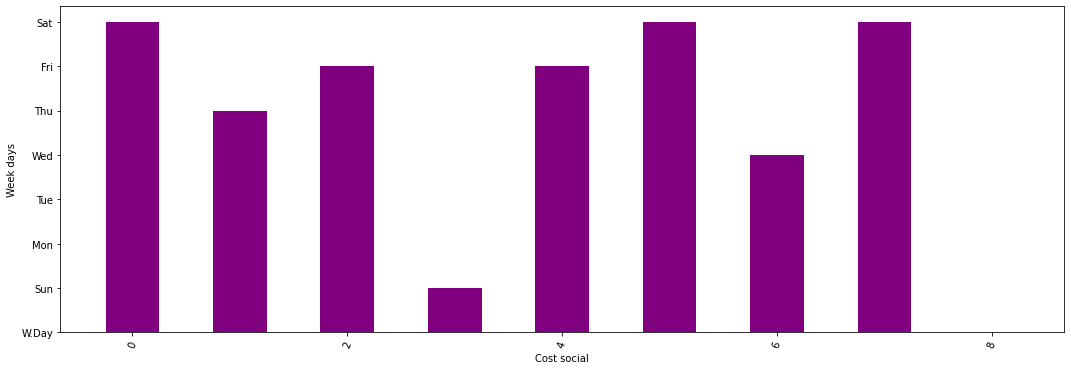

In [ ]:
plt.figure(figsize=(18,6))
plt.bar(cleaned_daily_data['Cost_others'],cleaned_daily_data_2['Week_days'],color='purple',width=0.5)
plt.xticks(rotation=70)
plt.xlabel('Cost social')
plt.ylabel('Week days')
plt.show()

importing libraries for machine learning regression model 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn .preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## **TPL conversion must be cost effective or higher conversion rate ?**

## TLP sales cost efficiency 

In [ ]:
#dividing into train test split data for TLP sales 
x_tlp= cleaned_daily_data[['Cost_googleadds','Cost_social','Cost_email/sms','Cost_others','TPL_Sales']]
y_tlp = cleaned_daily_data[['Leads_organic','Leads_direct','Leads_social','Total_leads']]

In [ ]:
x_tlp

,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,TPL_Sales
0,143,143,17,8,19
1,53,126,0,0,10
2,37,35,0,0,0
3,127,112,0,0,12
4,59,138,16,0,16
...,...,...,...,...,...
179,34,107,0,6,17
180,36,115,0,0,13
181,41,103,0,0,14
182,6,106,0,0,1


In [ ]:
y_tlp

,Leads_organic,Leads_direct,Leads_social,Total_leads
0,12,11,92,95
1,9,6,62,85
2,0,6,27,35
3,10,6,63,86
4,7,8,71,92
...,...,...,...,...
179,9,0,70,28
180,9,9,66,24
181,0,1,56,15
182,7,9,59,10


In [ ]:
x_tlp_train, x_tlp_test,y_tlp_train, y_tlp_test = train_test_split(x_tlp,y_tlp, test_size=0.2,random_state=10) 

In [ ]:
len(x_tlp_train) , len(x_tlp_test), len(y_tlp_train), len(y_tlp_test)

(147, 37, 147, 37)

In [ ]:
#linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn .preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

lr= LinearRegression()
lr.fit(x_tlp_train,y_tlp_train)

y_pred=lr.predict(x_tlp_test)

score_lr= lr.score(x_tlp_test,y_tlp_test)
accuracy_lr= cross_val_score(estimator=lr,X= x_tlp_train, y= y_tlp_train,cv=8, verbose=1)
r2_lr= r2_score(y_tlp_test,y_pred)
mse_lr = mean_squared_error(y_tlp_test,y_pred)

#printing results 
print("score is: ",score_lr)
print("accuracy is: ",accuracy_lr)
print("r2_score is: ",r2_lr)
print("mean squared error is: ",mse_lr)

score is:  0.0476732797631566
accuracy is:  [-0.20255461  0.08480601 -0.16169312 -0.13265628  0.02634605 -0.02286709
 -0.05049936  0.21930226]
r2_score is:  0.04203843053606496
mean squared error is:  406.0094366371907


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.mak

## **Comp Sales must be cost effective or higher conversion rate ?**

## Comp Sales cost efficiency 

In [ ]:
#dividing into train test split data for TLP sales 
x_comp= cleaned_daily_data[['Cost_googleadds','Cost_social','Cost_email/sms','Cost_others','Comp_Sales']]
y_comp = cleaned_daily_data[['Leads_organic','Leads_direct','Leads_social','Total_leads']]

In [ ]:
x_comp

,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,Comp_Sales
0,143,143,17,8,22
1,53,126,0,0,19
2,37,35,0,0,0
3,127,112,0,0,21
4,59,138,16,0,4
...,...,...,...,...,...
179,34,107,0,6,19
180,36,115,0,0,14
181,41,103,0,0,18
182,6,106,0,0,2


In [ ]:
y_comp

,Leads_organic,Leads_direct,Leads_social,Total_leads
0,12,11,92,95
1,9,6,62,85
2,0,6,27,35
3,10,6,63,86
4,7,8,71,92
...,...,...,...,...
179,9,0,70,28
180,9,9,66,24
181,0,1,56,15
182,7,9,59,10


In [ ]:
x_comp_train, x_comp_test, y_comp_train, y_comp_test = train_test_split(x_comp, y_comp,test_size=0.2,random_state=10)

In [ ]:
len(x_comp_train), len(x_comp_test), len(y_comp_train), len(y_comp_test)

(147, 37, 147, 37)

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_comp_train,y_comp_train)

y_pred=lr.predict(x_comp_test)

score_lr= lr.score(x_comp_test,y_comp_test)
accuracy_lr= cross_val_score(estimator=lr,X= x_comp_train, y= y_comp_train,cv=8, verbose=1)
r2_lr= r2_score(y_comp_test,y_pred)
mse_lr = mean_squared_error(y_comp_test,y_pred)

#printing results 
print("score is: ",score_lr)
print("accuracy is: ",accuracy_lr)
print("r2_score is: ",r2_lr)
print("mean squared error is: ",mse_lr)

score is:  0.020154542051325577
accuracy is:  [-0.244702   -0.05845616 -0.21610569 -0.18514099  0.03312909 -0.0923284
 -0.08335241  0.18909185]
r2_score is:  0.007072397493907978
mean squared error is:  417.74161526656735


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.mak

concluding both the regression models for TLP sales and Comp sales the preferance goes to cost efficiency since cost efficient models of both dataset are more accurate rather than we considering them as higher conversion rate 

## **Based on current performance forcast sales and CPA**

## Time Series analysis 

In [ ]:
cleaned_daily_data_2.head(5)

,Date,Sessions,Direct_sessions,paidsearch_sessions,Social_sessions,email/sms_sessions,others_sessions,Leads_organic,Leads_direct,Leads_paidsearch,Leads_social,Leads_email/sms,Leads_others,Total_leads,Cost_googleadds,Cost_social,Cost_email/sms,Cost_others,TPL_Sales,Comp_Sales,Week_days,week_no,Month
0,Date,Organic,Direct,Paid Search,Social,Email/SMS,Others,Organic,Direct,Paid Search,Social,Email/SMS,Others,Total Leads,Google ads,Social,Email/SMS,Others,TPL sales,Comp sales,W.Day,W. No,Month
1,2021-04-01 00:00:00,25,129,966,7,0,340,4,2,25,40,0,4,74,248,774,0,0,2,7,Sun,2,1
2,2021-04-02 00:00:00,7,44,285,0,0,14,0,2,0,15,0,0,17,2,150,0,0,0,0,Mon,2,1
3,2021-04-03 00:00:00,18,104,872,2,0,115,6,2,25,42,2,2,78,717,546,0,0,3,9,Tue,2,1
4,2021-04-04 00:00:00,25,179,1010,5,0,331,2,4,19,57,10,0,91,272,934,99,0,7,12,Wed,2,1


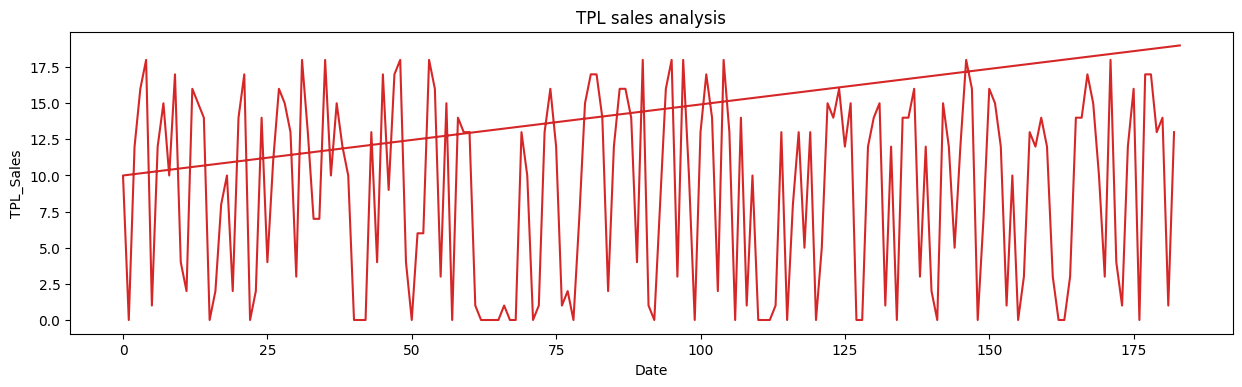

In [ ]:
def plot_daily_TPL(df, x, y, title="", xlabel='Date', ylabel='TPL_Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_daily_TPL(cleaned_daily_data, x=cleaned_daily_data['Date'], y=cleaned_daily_data['TPL_Sales'], title='TPL sales analysis')

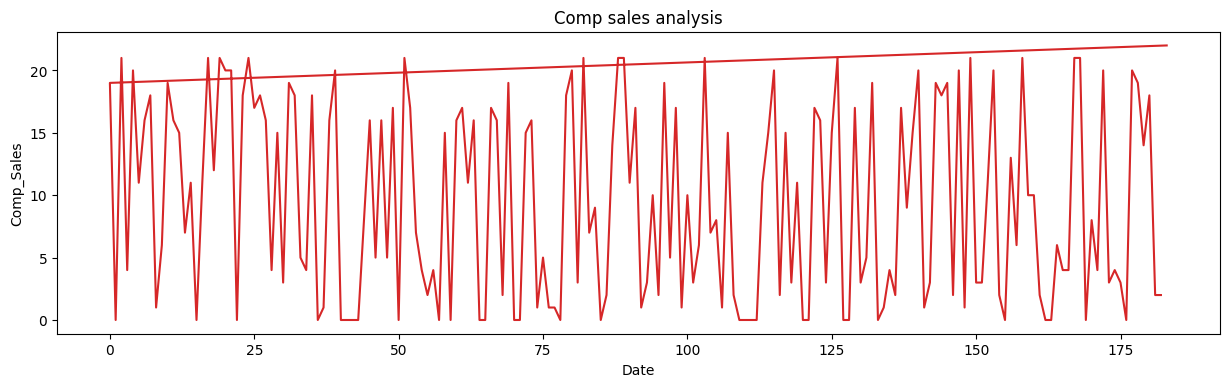

In [ ]:
def plot_daily_TPL(df, x, y, title="", xlabel='Date', ylabel='Comp_Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_daily_TPL(cleaned_daily_data, x=cleaned_daily_data['Date'], y=cleaned_daily_data['Comp_Sales'], title='Comp sales analysis')

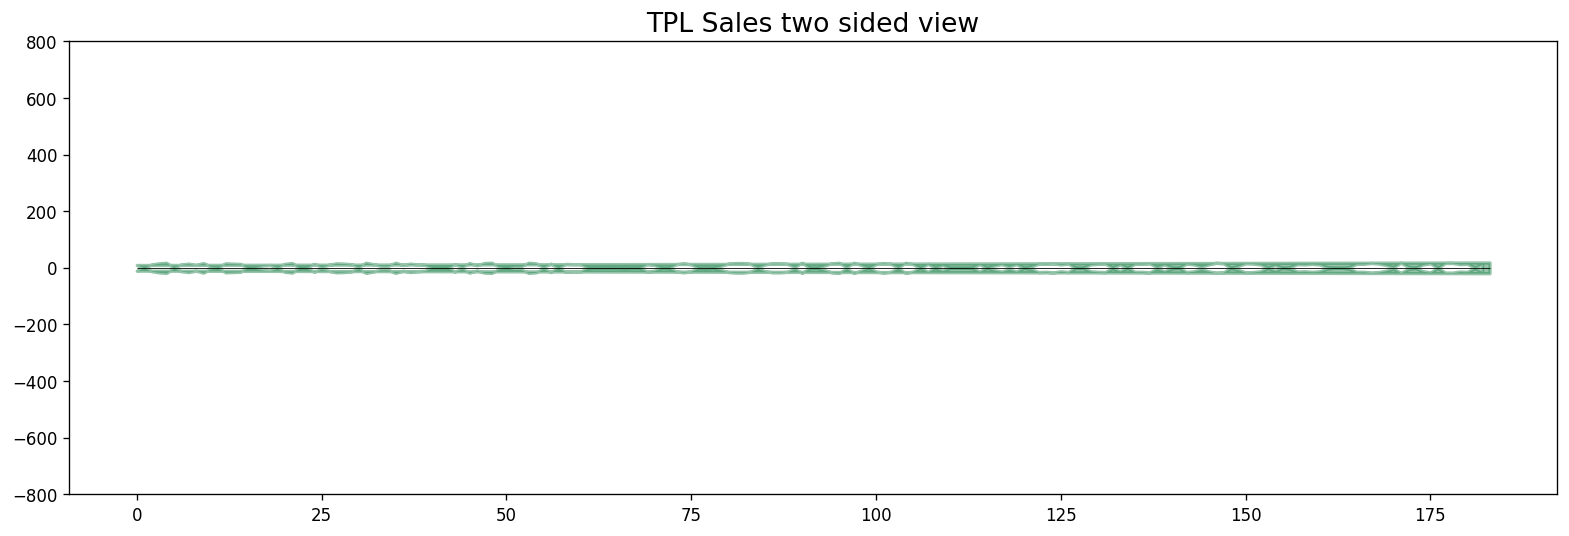

In [ ]:
x = cleaned_daily_data['Date'].values
y1 = cleaned_daily_data['TPL_Sales'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('TPL Sales two sided view', fontsize=16)
plt.hlines(y=0, xmin=np.min(cleaned_daily_data['Date']), xmax=np.max(cleaned_daily_data['Date']), linewidth=.5)
plt.show()

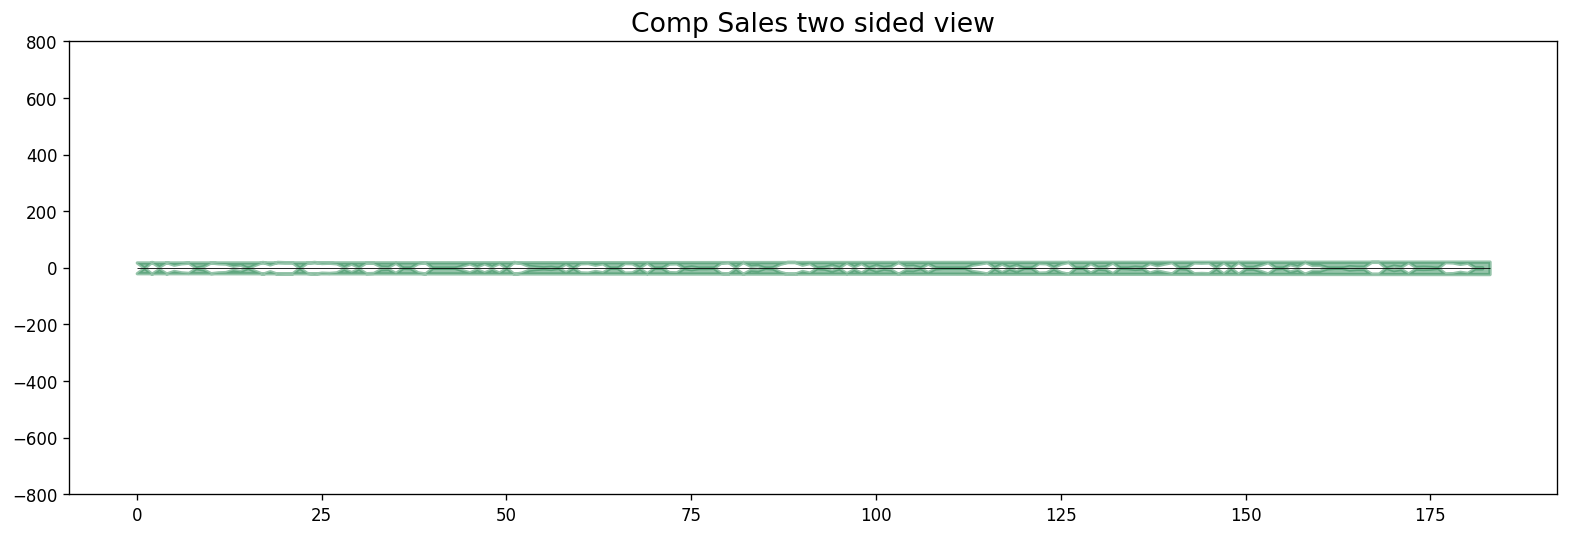

In [ ]:
x = cleaned_daily_data['Date'].values
y1 = cleaned_daily_data['Comp_Sales'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Comp Sales two sided view', fontsize=16)
plt.hlines(y=0, xmin=np.min(cleaned_daily_data['Date']), xmax=np.max(cleaned_daily_data['Date']), linewidth=.5)
plt.show()

Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

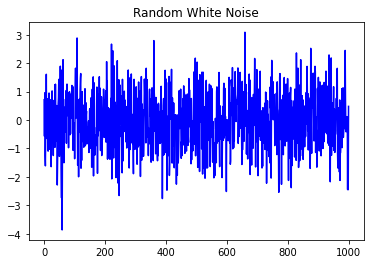

In [ ]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:
Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

We subtract the trend component obtained from time series decomposition.

Subtract the mean.

Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

Now, we will implement the first two methods to detrend a time series.

Text(0.5, 1.0, 'Comp Sales detrended by subtracting the least squares fit')

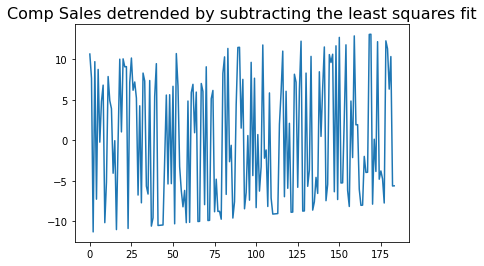

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(cleaned_daily_data['Comp_Sales'].values)
plt.plot(detrended)
plt.title('Comp Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'TPL Sales detrended by subtracting the least squares fit')

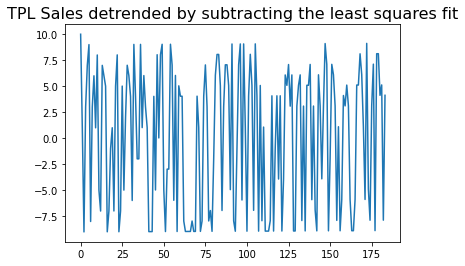

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(cleaned_daily_data['TPL_Sales'].values)
plt.plot(detrended)
plt.title('TPL Sales detrended by subtracting the least squares fit', fontsize=16)

he common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

Hour of day
Day of month
Weekly
Monthly
Yearly
However, if we want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

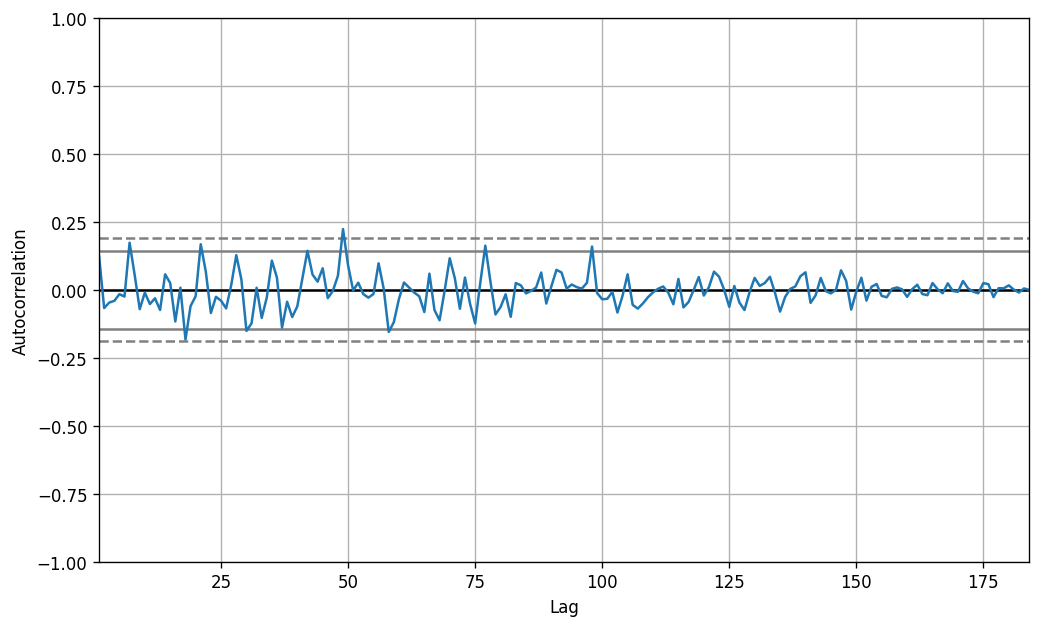

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(cleaned_daily_data['TPL_Sales'].tolist())

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


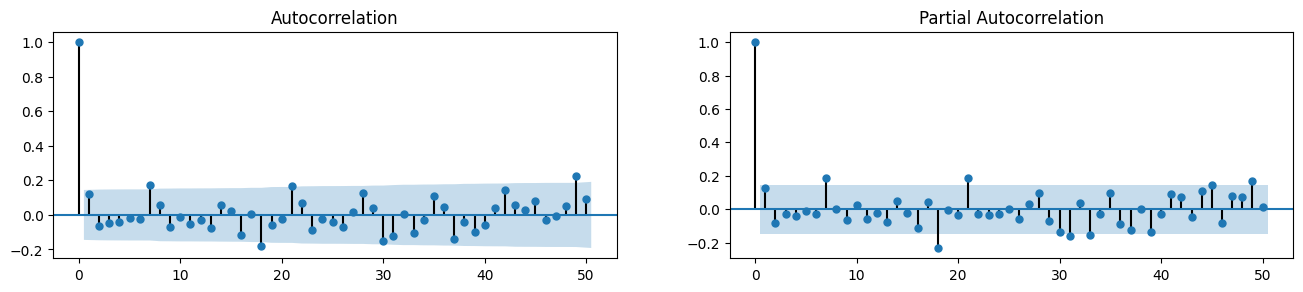

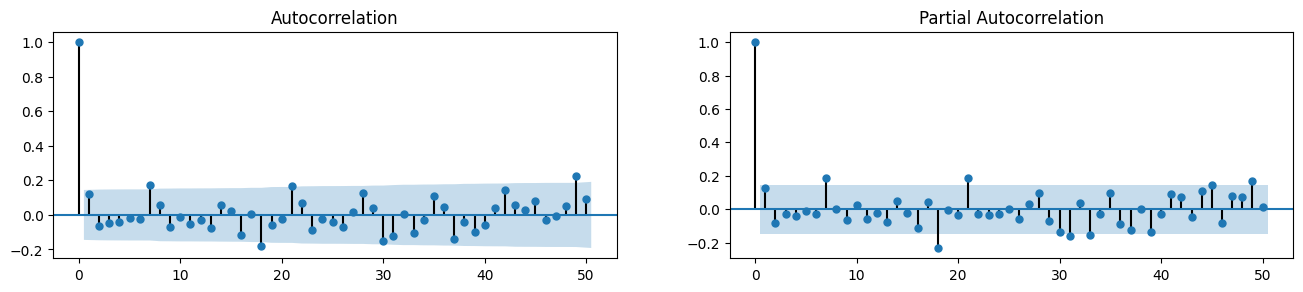

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(cleaned_daily_data['TPL_Sales'].tolist(), lags=50, ax=axes[0])
plot_pacf(cleaned_daily_data['TPL_Sales'].tolist(), lags=50, ax=axes[1])

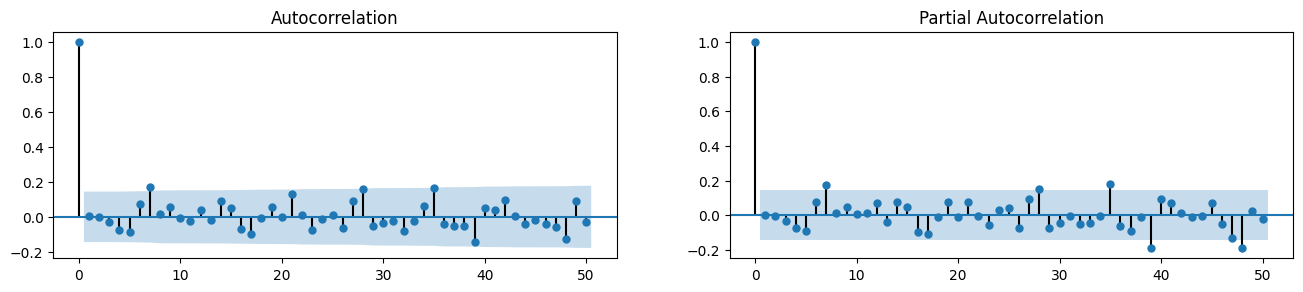

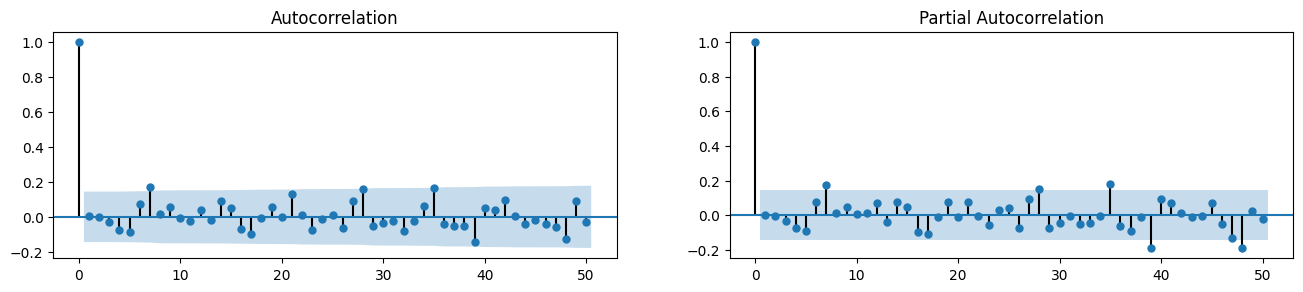

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(cleaned_daily_data['Comp_Sales'].tolist(), lags=50, ax=axes[0])
plot_pacf(cleaned_daily_data['Comp_Sales'].tolist(), lags=50, ax=axes[1])

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

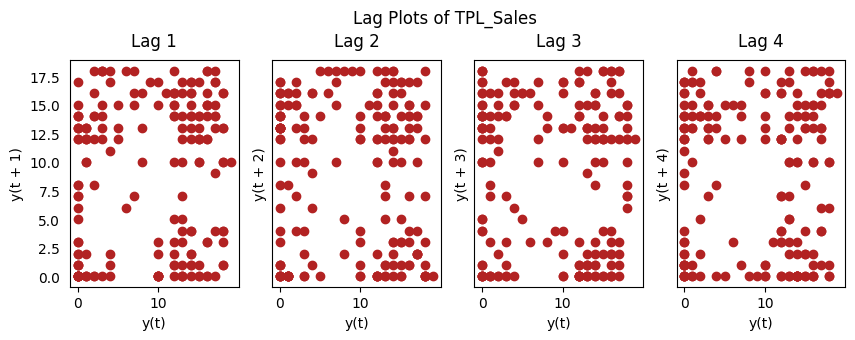

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(cleaned_daily_data['TPL_Sales'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of TPL_Sales', y=1.05)    
plt.show()

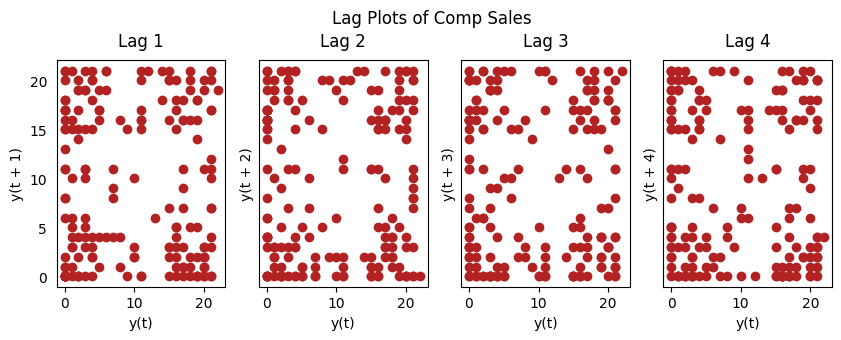

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(cleaned_daily_data['Comp_Sales'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Comp Sales', y=1.05)    
plt.show()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
from collections import Counter


## **Return of ad spend according to net revenue**

In [ ]:
sales_data.head(3)

,Date,Policy Type,Amount Paid,Lead Source,Lead Medium,GMV,Premium Value
0,2021-04-01,comprehensive,1029.0,Direct,Direct,980,1400
1,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000
2,2021-04-01,comprehensive,1470.0,fb,cpc,1400,2000


In [ ]:
sales_data.describe(include='all')

,Date,Policy Type,Amount Paid,Lead Source,Lead Medium,GMV,Premium Value
count,2304,2304,2304.000000,2304,2304,2304.000000,2304.000000
unique,161,2,NaN,8,21,NaN,NaN
top,2021-06-27 00:00:00,comprehensive,NaN,Direct,Direct,NaN,NaN
freq,33,1288,NaN,970,970,NaN,NaN
first,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,964.440039,NaN,NaN,918.493056,1300.782986
std,NaN,NaN,605.619463,NaN,NaN,576.802687,815.130891
min,NaN,NaN,77.700000,NaN,NaN,74.000000,74.000000
25%,NaN,NaN,630.000000,NaN,NaN,600.000000,750.000000


first we will seperately find sales sum of both the catergories including comprehensive and third party and named as sales_table

In [ ]:
sales_table=sales_data[["Policy Type","Amount Paid","GMV","Premium Value"]].groupby("Policy Type").sum()
sales_table

,Amount Paid,GMV,Premium Value
Policy Type,,,
comprehensive,1629168.04,1551599,2169867
third_party,592901.81,564609,827137


since the net revenue will be found by subtracting all expenses and amount paid therefore we will find net revenue by subtracting amound paid from premium value seperately for comprehensive and third party

In [ ]:
net_revenue= sales_table['Premium Value']-sales_table['Amount Paid'].groupby("Policy Type").sum()
net_revenue

Policy Type
comprehensive    540698.96
third_party      234235.19
dtype: float64

The premium value will show seperate total cost of both the categories 

In [ ]:
total_cost= sales_table['Premium Value'].groupby('Policy Type').sum()
total_cost

Policy Type
comprehensive    2169867
third_party       827137
Name: Premium Value, dtype: int64

## **Return on add spend (ROAS)**

Return on ad spend (ROAS) is a marketing metric that measures the amount of revenue earned for every dollar spent on advertising

In [ ]:
ROAS = net_revenue/total_cost
ROAS

Policy Type
comprehensive    0.249185
third_party      0.283188
dtype: float64